## Covid-19 Dataset 

### This is dataset is of  till 29 April 2020

In [331]:
import numpy as np
import pandas as pd 

#### Importing the Covid-19 Dataset 

In [332]:
df = pd.read_csv('covid_19_data.csv')
df.head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [333]:
df.shape

(321, 6)

#### It contains 321 rows and 6 columns 

In [334]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

#### By this we found that we have null values or missing values present in the state column 

In [335]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

#### 181 Missing values are found in state column 

In [336]:
df_fill = df.fillna('Missing',inplace= True)
df_fill

#### In this we have filled Nan Values as Missing 

In [337]:
df.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

#### We have filled the all the Null values and hence no null values are present in the dataset

In [338]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Missing,Afghanistan,1939,60,252
1,4/29/2020,Missing,Albania,766,30,455
2,4/29/2020,Missing,Algeria,3848,444,1702
3,4/29/2020,Missing,Andorra,743,42,423
4,4/29/2020,Missing,Angola,27,2,7


In [339]:
df.shape

(321, 6)

### Data Visualization 

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Seeing the number of confirmed , death and recovered cases in each region 

In [341]:
count = df['Region'].value_counts()
print(count)

US                58
Mainland China    31
Canada            15
France            11
UK                11
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Macau              1
Name: Region, Length: 187, dtype: int64


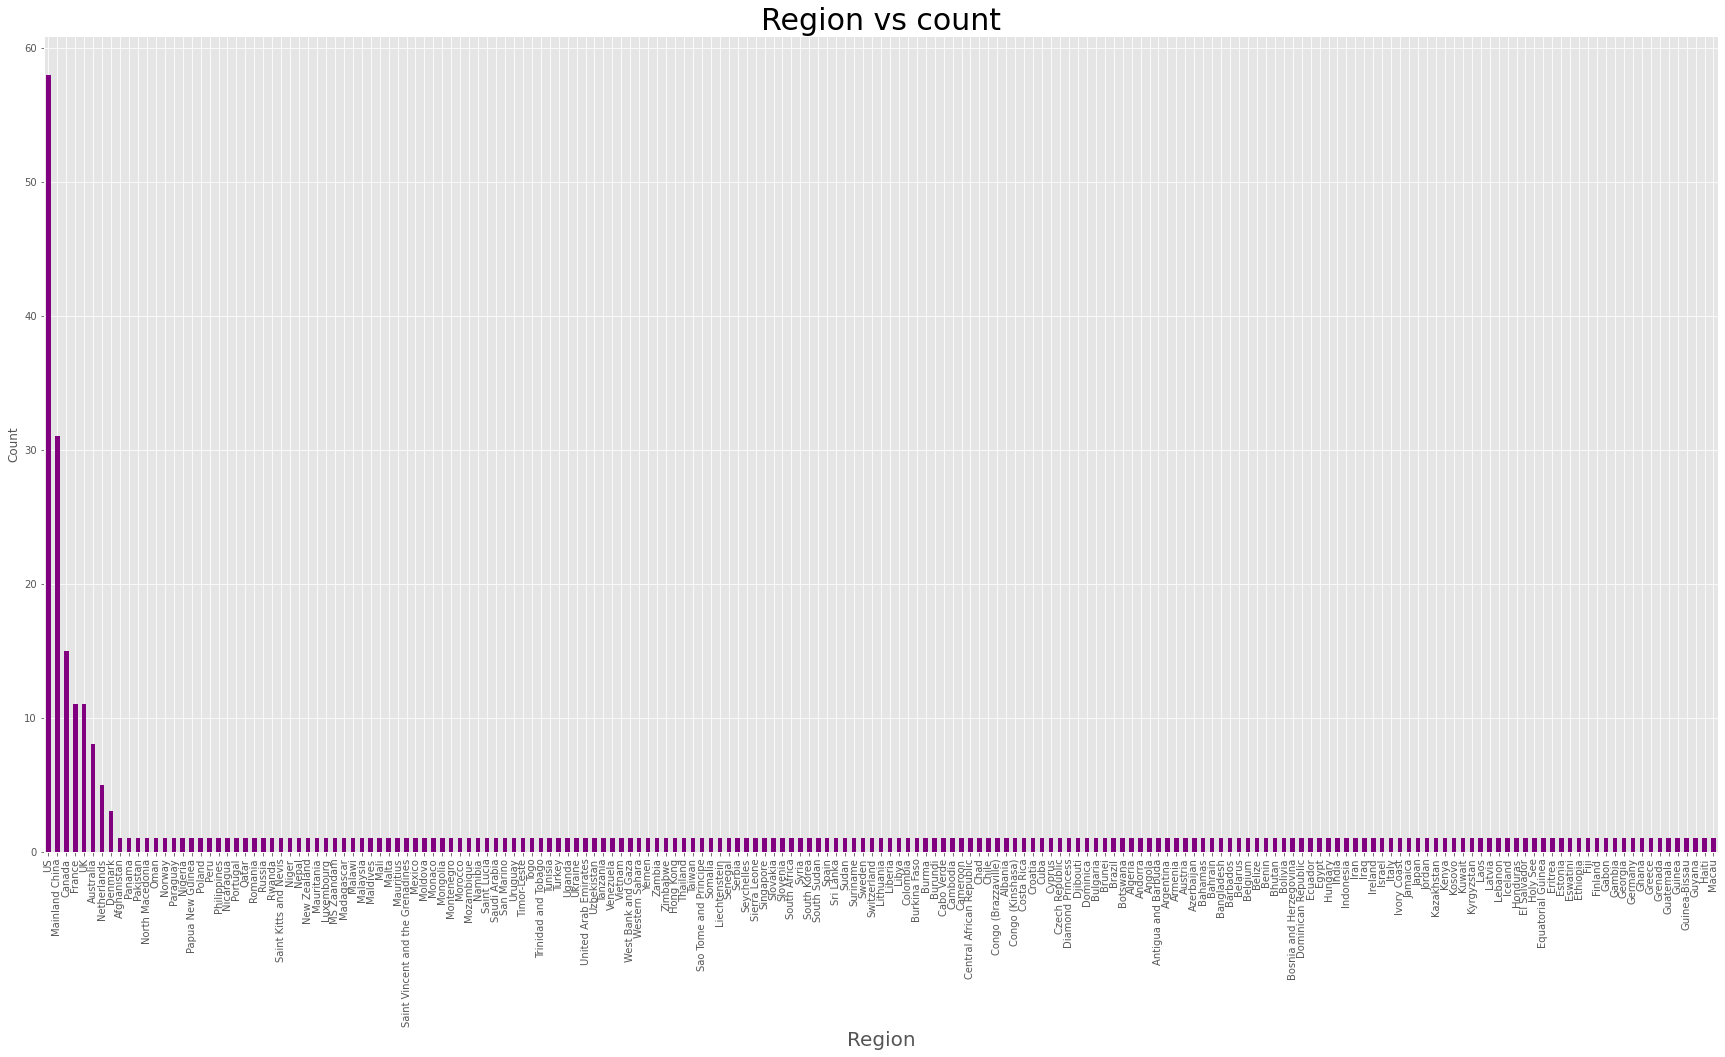

In [342]:
plt.rcParams['figure.figsize'] = (30, 15)
df['Region'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Region vs count', fontsize = 30)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Count')
plt.show()

### US has the 58 states where as the other countries  have only single state in its region 

In [343]:
df.groupby('Region').sum().head(10)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [344]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

### From this we can say that 
### 1) Highest confirmed cases was from the US
### 2)Second highest cases recorded was from Spain 
### 3)Least confirmed cases was from Yemen and western sahara 

In [345]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending = False)

Region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
               ...  
Holy See           0
Grenada            0
South Sudan        0
Nepal              0
Laos               0
Name: Deaths, Length: 187, dtype: int64

### From this we can say that 
### 1) Highest Death case recorded was from the US
### 2)Second Highest Death case recorded was from Spain 
### 3)Nepal,south sudan, Grenada Many other countries  Recorded Zero Death case

In [346]:
df.groupby('Region')['Recovered'].sum().sort_values(ascending = False)

Region
Spain               132929
US                  120720
Germany             120400
Mainland China       77610
Iran                 73791
                     ...  
Cabo Verde               2
Yemen                    1
South Sudan              0
Papua New Guinea         0
MS Zaandam               0
Name: Recovered, Length: 187, dtype: int64

### From this we can say that 
### 1) Highest Recovery rate  recorded was from the spain
### 2)Second Highest Recovery rate recorded was from  US 
### 3)Yemen and other countries has less affecetd 

## We are  comparing confirmed cases vs Deaths 

In [347]:
df.groupby('Region')['Confirmed','Deaths'].sum(50)

C:\Users\SUNNY\AppData\Local\Temp\ipykernel_8200\1803366285.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed','Deaths'].sum(50)


,Confirmed,Deaths
Region,,
Afghanistan,1939,60
Albania,766,30
Algeria,3848,444
Andorra,743,42
Angola,27,2
...,...,...
West Bank and Gaza,344,2
Western Sahara,6,0
Yemen,6,0


### We are comparing Confirmed cases vs Recovered cases

In [348]:
df.groupby('Region')['Confirmed','Recovered'].sum()

C:\Users\SUNNY\AppData\Local\Temp\ipykernel_8200\106003874.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### Dropping the rows whos confirmed cases are less than 10

In [351]:
new_df = df[~(df.Confirmed < 10)]

In [352]:
new_df.shape

(304, 6)

#### We have dropped the confirmed cases which are less than 10 and we can see the shape of the data set has been reduced 

## We are finding in which region the maximum cases were Recorded

In [354]:
df.groupby('Region').Confirmed.sum().sort_values(ascending= False).head(20)
                                                                       

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### In this we came to know that US country has Recorded Maximum number of cases
### Yemen has recorded very less no of cases 

## We are finding in which region the Minimum Deaths were Recorded

In [355]:
df.groupby('Region').Deaths.sum().sort_values(ascending= True).head(50)
                                                                

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

### In this we came to know that Laos and few  countries has Recorded Minimum Number of deaths 
### US has recorded Maximum Number of deaths

## In this we are checking particular countries in which how many Confirmed,Deaths,Recovered cases were Recorded till 29 APR 2020

In [368]:
df[df.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,Missing,India,33062,1079,8437


In [369]:
df[df.Region == 'Spain']

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,Missing,Spain,236899,24275,132929


In [371]:
df[df.Region == 'US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


#### Here we have selected 3 countries
#### 1) India
#### 2) Spain
#### 3) US 
#### Following observation were Recorded for the Confirmed , Death , Recovered cases for the Above 3 Countries 

### To detect the outliers in the dataset

C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

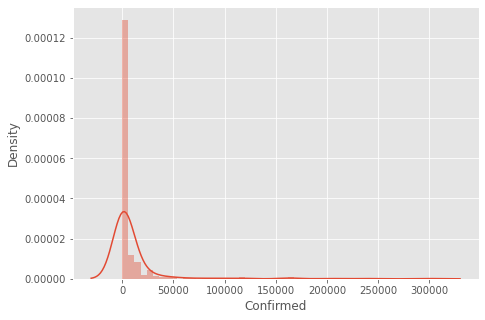

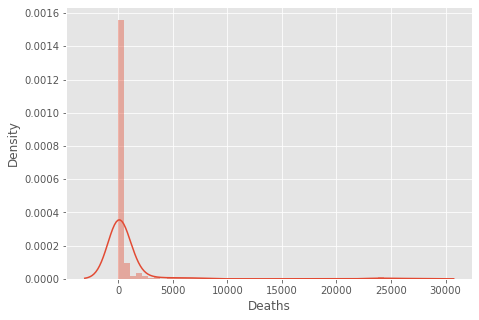

In [409]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Confirmed'])

plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['Deaths'])


C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confirmed'>

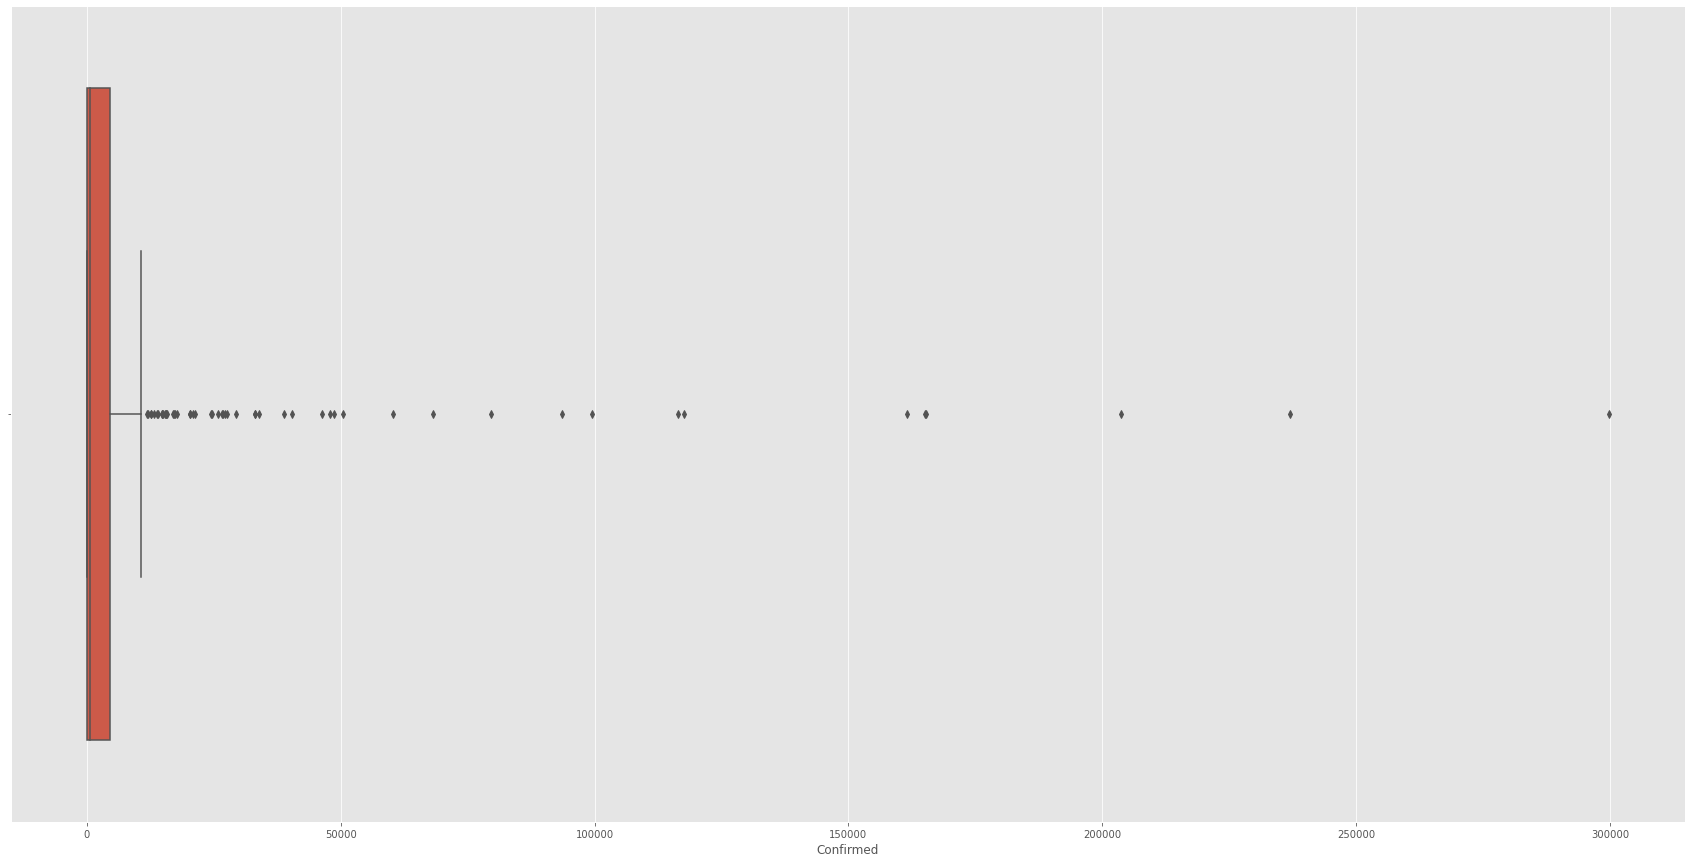

In [406]:
sns.boxplot(df['Confirmed'])

C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deaths'>

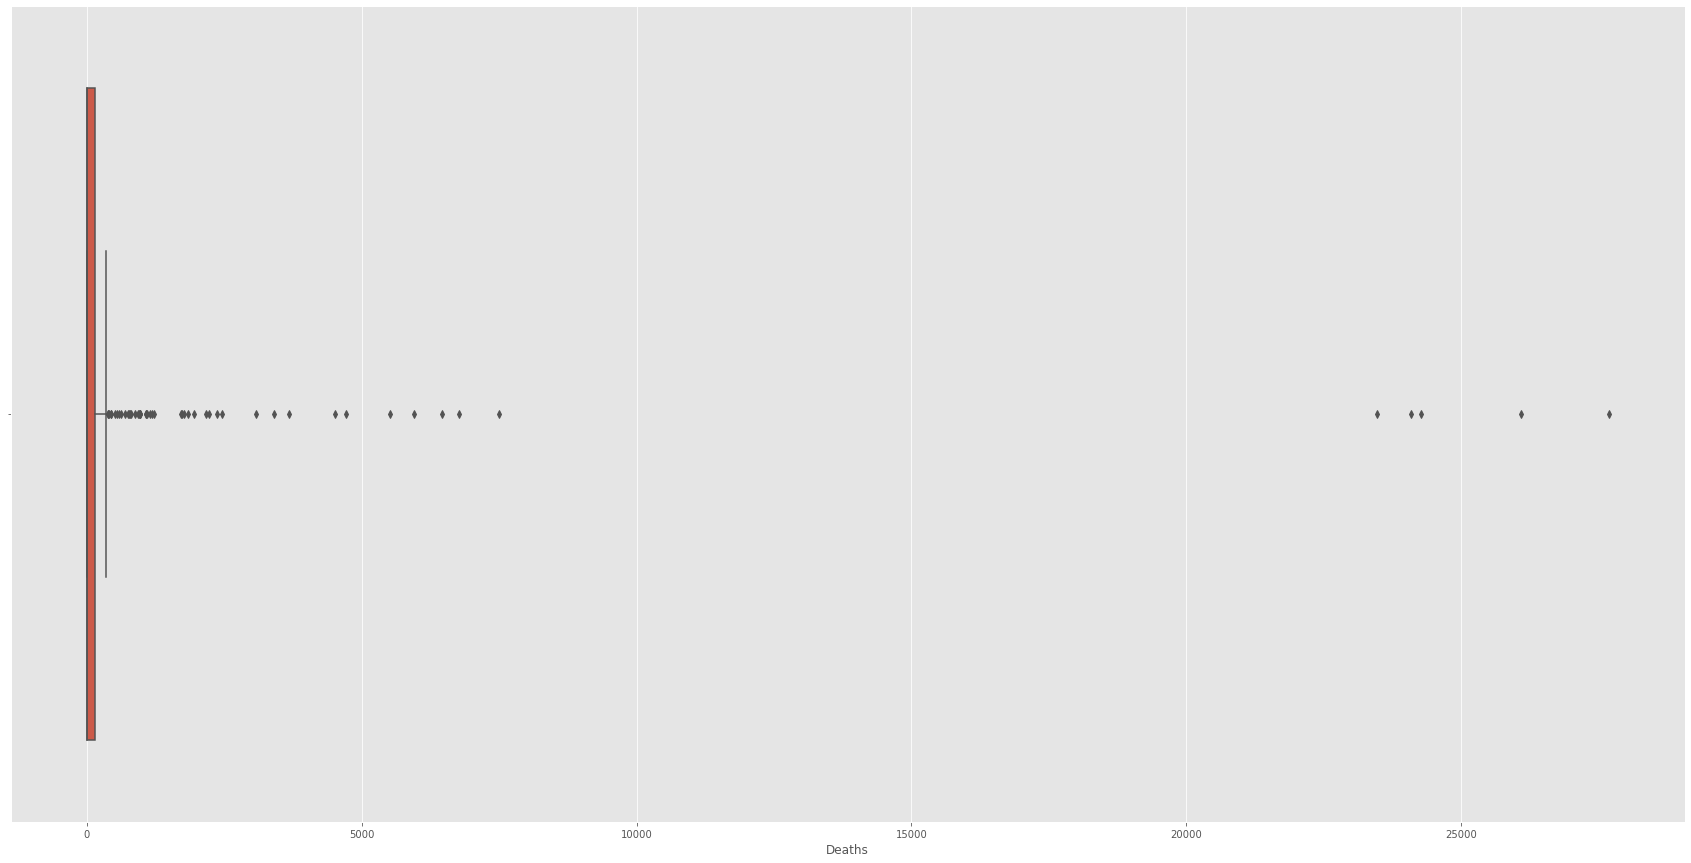

In [407]:
sns.boxplot(df['Deaths'])

### We Plotted Boxplot to detect the outliers in the data set and these outliers can be removed by various techniques

In [413]:
### Finding the IQR
Percentile25 = df['Deaths'].quantile(0.25)
Percentile75 = df['Deaths'].quantile(0.75)


In [416]:
Percentile25

2.0

In [417]:
Percentile75

144.0

In [418]:
IQR = Percentile75-Percentile25

In [419]:
IQR

142.0

In [420]:
df.shape

(321, 6)

In [422]:
upper_limit=Percentile75+1.5*IQR
lower_limit=Percentile25-1.5*IQR

In [423]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 357.0
lower_limit -211.0


### Finding the outliers

In [425]:
df[(df['Deaths']>357.0) | (df['Deaths'] <-211)]

,Date,State,Region,Confirmed,Deaths,Recovered
2,4/29/2020,Missing,Algeria,3848,444,1702
8,4/29/2020,Missing,Austria,15402,580,12779
15,4/29/2020,Missing,Belgium,47859,7501,11283
22,4/29/2020,Missing,Brazil,79685,5513,34132
42,4/29/2020,Missing,Denmark,9008,443,6366
47,4/29/2020,Missing,Ecuador,24675,883,1557
48,4/29/2020,Missing,Egypt,5268,380,1335
57,4/29/2020,Missing,France,165093,24087,48228
61,4/29/2020,Missing,Germany,161539,6467,120400
74,4/29/2020,Missing,India,33062,1079,8437


In [431]:
df[(df['Deaths'] > upper_limit)]

,Date,State,Region,Confirmed,Deaths,Recovered
2,4/29/2020,Missing,Algeria,3848,444,1702
8,4/29/2020,Missing,Austria,15402,580,12779
15,4/29/2020,Missing,Belgium,47859,7501,11283
22,4/29/2020,Missing,Brazil,79685,5513,34132
42,4/29/2020,Missing,Denmark,9008,443,6366
47,4/29/2020,Missing,Ecuador,24675,883,1557
48,4/29/2020,Missing,Egypt,5268,380,1335
57,4/29/2020,Missing,France,165093,24087,48228
61,4/29/2020,Missing,Germany,161539,6467,120400
74,4/29/2020,Missing,India,33062,1079,8437


In [428]:
df[(df['Deaths'] < lower_limit)]

,Date,State,Region,Confirmed,Deaths,Recovered


### In upper_limits we found outliers
### In lower_limits we didnt found outliers

In [437]:
new_df = df[(df['Deaths']<357.0)]

In [438]:
new_df.shape

(271, 6)

#### We can see the data shape has been reduced compared to  original dataset

C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deaths'>

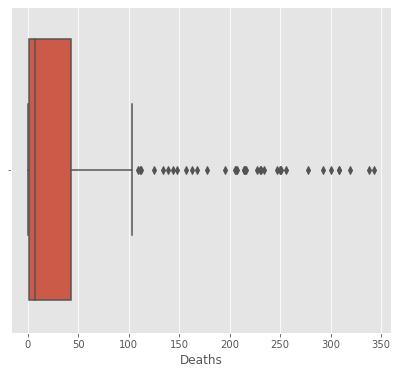

In [451]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.boxplot(new_df['Deaths'])

### Outliers removal is performed on Confirmed cases

C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confirmed'>

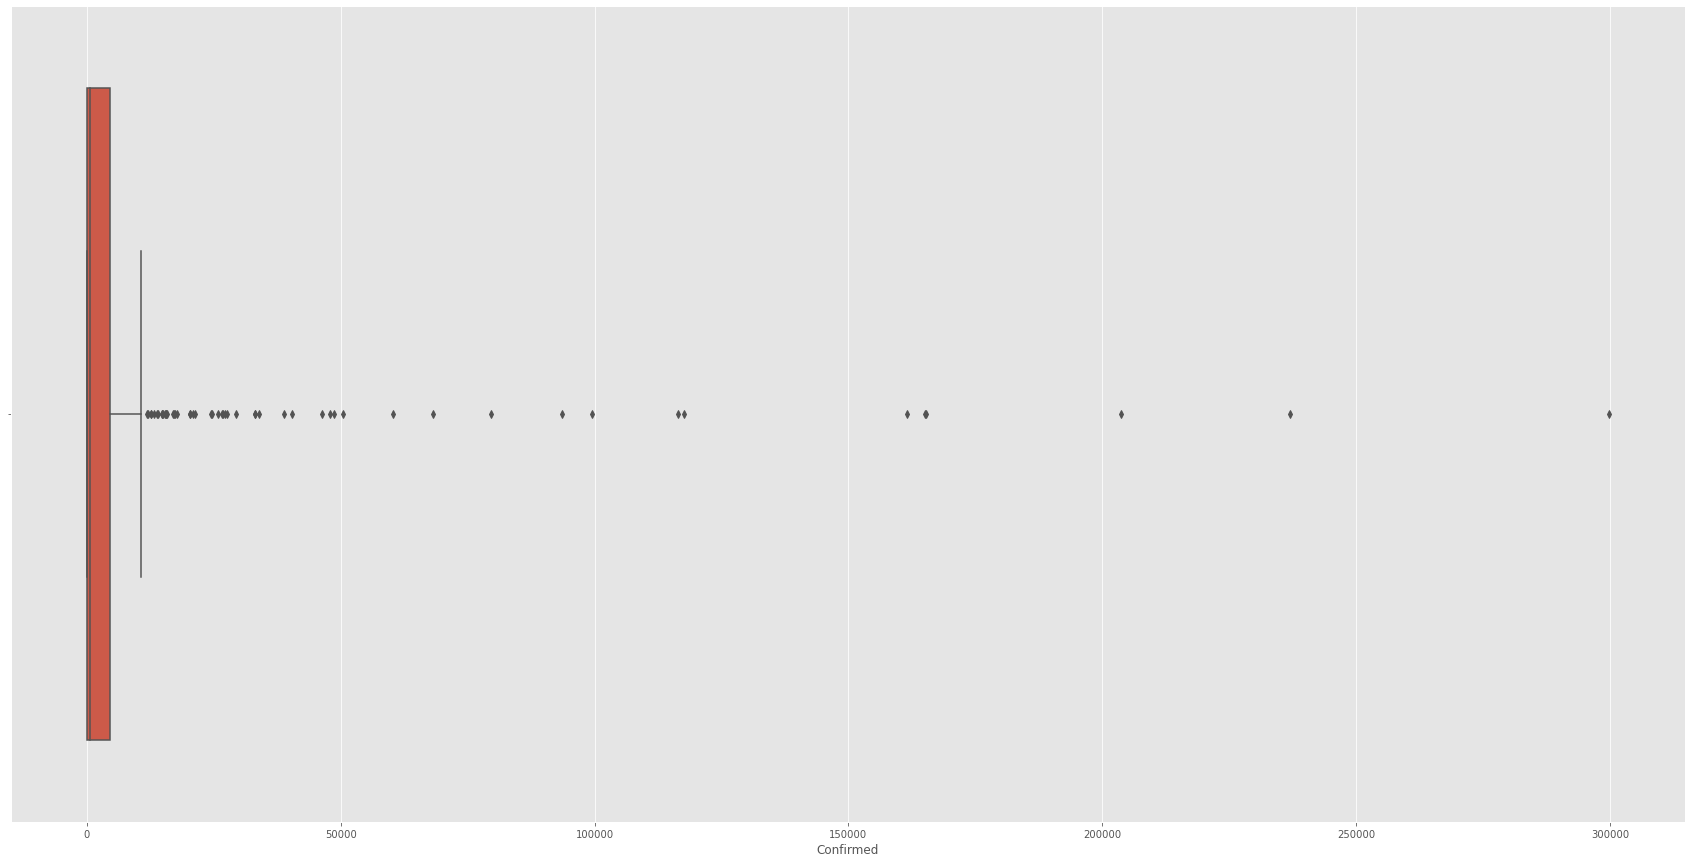

In [452]:
sns.boxplot(df['Confirmed'])

In [453]:
percentile25=df['Confirmed'].quantile(0.25)
percentile75=df['Confirmed'].quantile(0.75)

In [454]:
IQR = percentile75-percentile25

In [455]:
IQR

4551.0

In [456]:
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR

In [457]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 11481.5
lower_limit -6722.5


In [465]:
### Finding the outliers 

In [466]:
df[(df['Confirmed']>11481.5 ) | (df['Confirmed']< -6722.5 )]

,Date,State,Region,Confirmed,Deaths,Recovered
8,4/29/2020,Missing,Austria,15402,580,12779
14,4/29/2020,Missing,Belarus,13181,84,2072
15,4/29/2020,Missing,Belgium,47859,7501,11283
22,4/29/2020,Missing,Brazil,79685,5513,34132
33,4/29/2020,Missing,Chile,14885,216,8057
47,4/29/2020,Missing,Ecuador,24675,883,1557
57,4/29/2020,Missing,France,165093,24087,48228
61,4/29/2020,Missing,Germany,161539,6467,120400
74,4/29/2020,Missing,India,33062,1079,8437
76,4/29/2020,Missing,Iran,93657,5957,73791


In [469]:
new_df1 = df[(df['Confirmed']<11481.5)]

In [471]:
new_df1

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Missing,Afghanistan,1939,60,252
1,4/29/2020,Missing,Albania,766,30,455
2,4/29/2020,Missing,Algeria,3848,444,1702
3,4/29/2020,Missing,Andorra,743,42,423
4,4/29/2020,Missing,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confirmed'>

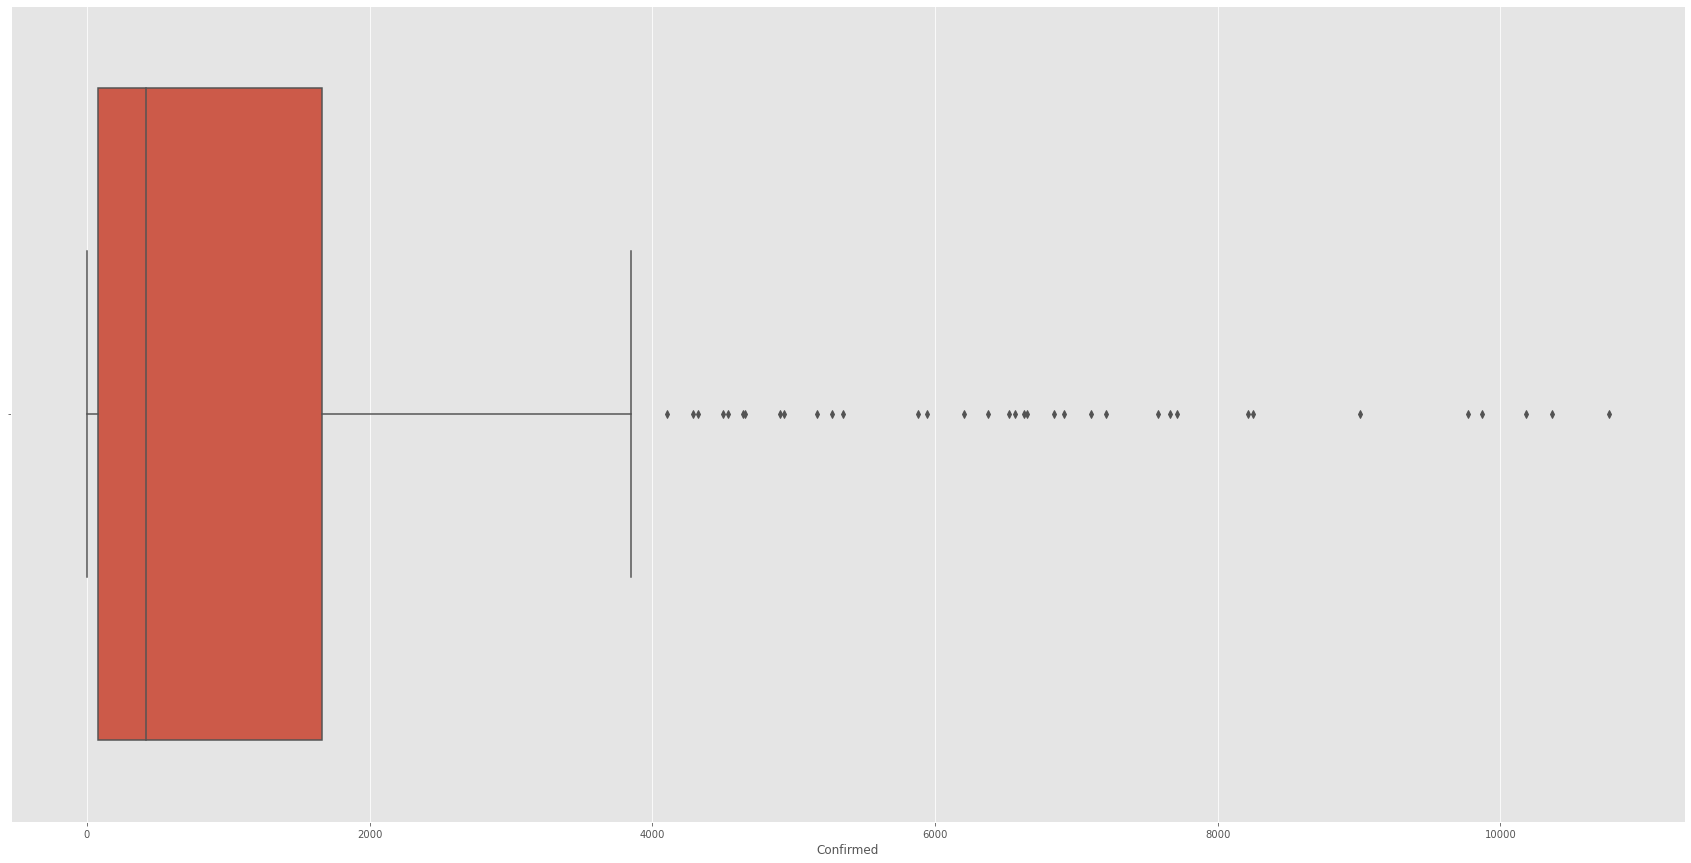

In [472]:
sns.boxplot(new_df1['Confirmed'])

### Most of the outliers has been treated and the difference can be seen

# The EDA has been performed to the covid-19 Dataset 

# Maximum cases were obsereved in US
# Least Death rate or zero Death rate were obsereved in few regions (Ex:Laos,Mongolia,Mozambique,Cambodia,Fiji Namibia,Nepal,Madagascar)